# Sprawozdanie Metody Rozpoznawania Obrazów
## Laboratorium 2 - Metoda najbliższych sąsiadów
### Wykonanie Patryk Sładek
Celem ćwiczenia było zapoznanie się z podstawowymi algorytmami i pojęciami z zakresu klasteryzcji. Między innymi własna implementacja algorytmu k-means, klasteryzacja hierarchiczna oraz wykrywanie społeczności w dużym grafie.

## k - means
Algorytm k-means zaimplementowałem w dwóch wariantach. Pierwszy wariant - przy inicjalizacji środków klastrów nie stosujemy, żadnej specjalnej metody, po prostu wybieramy k losowych punktów. W drugim wariancie zastosowałem wersję k-means ++.

Implementacja algorytmu zawiera się w pojedynczej klasie

In [6]:
from collections import defaultdict
from scipy.io import loadmat
import numpy as np
import random
from scipy.spatial import distance
from matplotlib import pyplot as plt
import os

In [7]:
class KMeans:
    def __init__(self, K, X, metrics=distance.euclidean, iterations=1):
        self.K = K
        self.X = X
        self.N = X.shape[0]
        self.clusters = None
        self.centers = []
        self.metrics = metrics
        self.iterations = iterations
        self.prev_centers = []

    def plot_clusters(self):
        directory_name = 'results/k({k})/metric({metric.__name__})'.format(k=self.K, metric=self.metrics)
        if not os.path.exists(directory_name):
            os.makedirs(directory_name)
        for cluster, faces in self.clusters.items():
            figure = plt.figure()
            title = 'Cluster {id}, K - {k}, Metric - {metric.__name__}'.format(id=cluster, k=self.K,
                                                                               metric=self.metrics)
            figure.suptitle(title, fontsize=14, fontweight='bold')
            figure.subplots_adjust(top=1)
            image_size = np.ceil(np.sqrt(len(faces))).astype(int)
            for i, vector in enumerate(faces):
                image = features_to_image[tuple(vector)]
                subplot = figure.add_subplot(image_size, image_size, i + 1)
                subplot.imshow(image, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
                subplot.axis('off')
            figure.tight_layout()
            figure.subplots_adjust(left=0, bottom=0, right=1, top=0.9, wspace=0.2, hspace=0.2)
            save_path = os.path.join(directory_name, '{}.png'.format(cluster))
            figure.savefig(save_path)
        plt.show()

    def nearest_centroid(self, x_element):
        return np.argmin([self.metrics(center, x_element) for center in self.centers])

    def clusterize(self):
        for i in tqdm(range(self.iterations)):
            if self.check_for_stop():
                print(i)
                break
            self.clusters = defaultdict(list)
            self.prev_centers = list(self.centers)
            for x_element in self.X:
                self.clusters[self.nearest_centroid(x_element)].append(x_element)
            self.recompute_centers()
        self.plot_clusters()

        return self.clusters

    def check_for_stop(self):
        return np.array_equiv(np.sort(self.prev_centers, axis=0), np.sort(self.centers, axis=0))

    def recompute_centers(self):
        for cluster, vectors in self.clusters.items():
            self.centers[cluster] = np.mean(vectors, axis=0)

    def find_centers(self):
        self.centers = random.choices(self.X, k=self.K)


Do wizualizacji zastosowałem metodę wyświetlania klastrów zdjęć na pojedynczych obrazkach

  0%|          | 0/100 [00:00<?, ?it/s]

K-means
find_centers - elapsed time: 1.5974044799804688e-05


100%|██████████| 100/100 [00:01<00:00, 93.06it/s]


clusterize - elapsed time: 1.0777232646942139


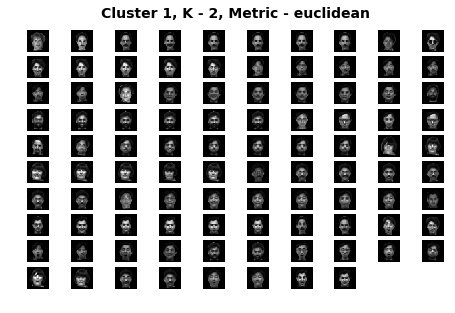

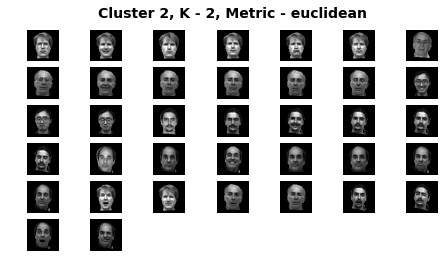

 11%|█         | 11/100 [00:00<00:00, 103.24it/s]

K-means Plus Plus
find_centers - elapsed time: 1.6927719116210938e-05


100%|██████████| 100/100 [00:00<00:00, 113.15it/s]


clusterize - elapsed time: 0.8866097927093506


KeyboardInterrupt: 

In [1]:
import kmeans
kmeans.run_kmeans()
kmeans.run_kmeans_plus_plus()

Z powyższego eksperymentu można wysnuć następujące wnioski. Algorytm w wersji plus plus jest odrobinę wolniejszy przy szukaniu środków, ale zyskujemy czas podczas klasteryzacji. Wyniki eksperymentu dla algorytmu plus plus są również bardziej sensowne od tych zwróconych przez algorytm w podstawowej wersji.

Następnie przeprowadziłem eksperyment sprawdzający wpływ metryki na wyniki eksperymentu. Zbadałem różnicę pomiędzy odległością euklidesową a odległością Mahalanobisa

 12%|█▏        | 12/100 [00:00<00:00, 110.94it/s]

find_centers - elapsed time: 0.005764007568359375


100%|██████████| 100/100 [00:00<00:00, 112.86it/s]


clusterize - elapsed time: 0.8892960548400879


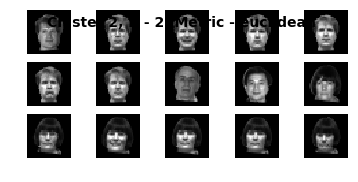

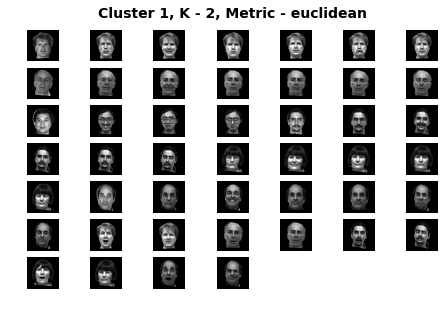

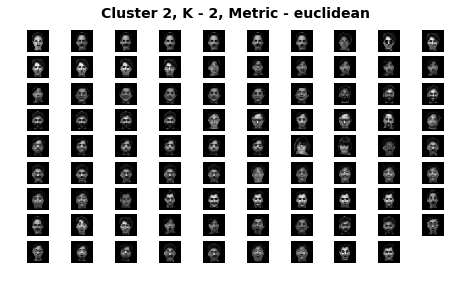

 19%|█▉        | 19/100 [00:00<00:00, 183.85it/s]

find_centers - elapsed time: 0.00379180908203125


100%|██████████| 100/100 [00:00<00:00, 170.41it/s]


clusterize - elapsed time: 0.5917441844940186


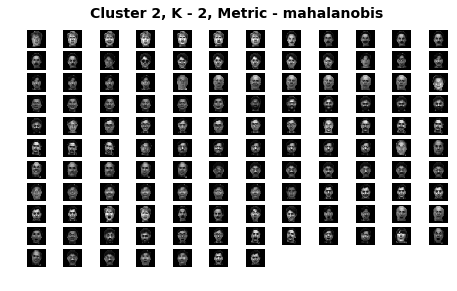

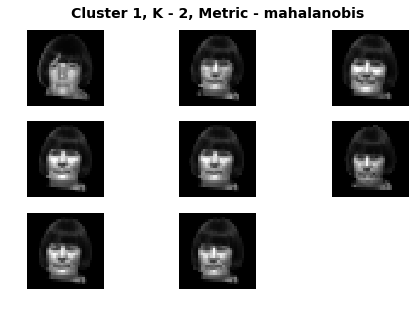

  5%|▌         | 5/100 [00:00<00:01, 49.45it/s]

find_centers - elapsed time: 0.05314326286315918


100%|██████████| 100/100 [00:01<00:00, 50.37it/s]


clusterize - elapsed time: 1.989854097366333


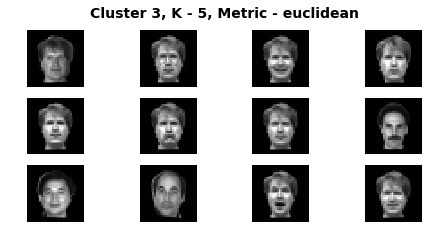

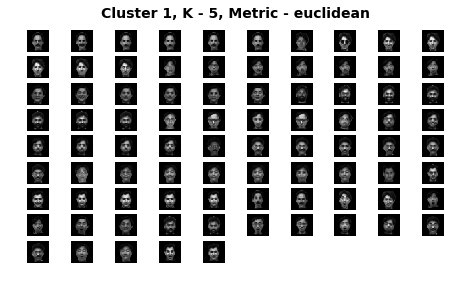

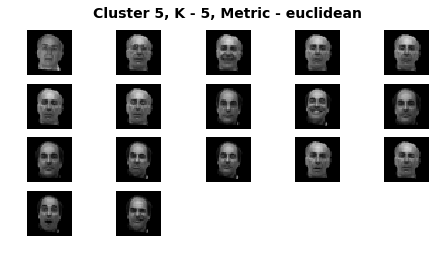

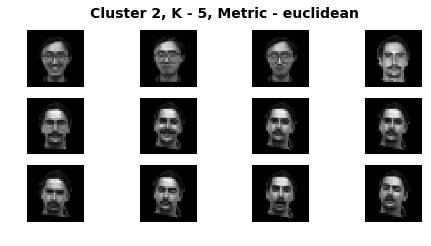

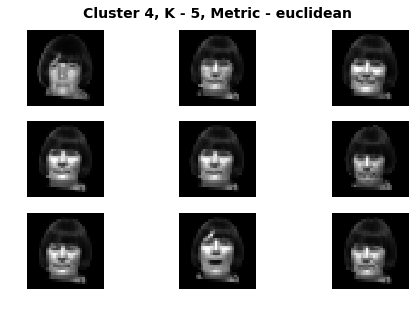

  9%|▉         | 9/100 [00:00<00:01, 86.46it/s]

find_centers - elapsed time: 0.024777889251708984


100%|██████████| 100/100 [00:01<00:00, 81.47it/s]


clusterize - elapsed time: 1.2308809757232666


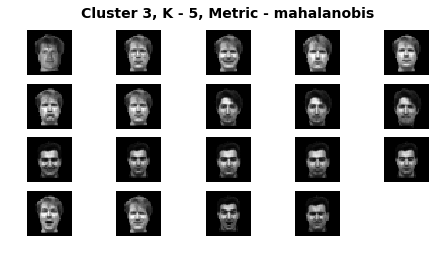

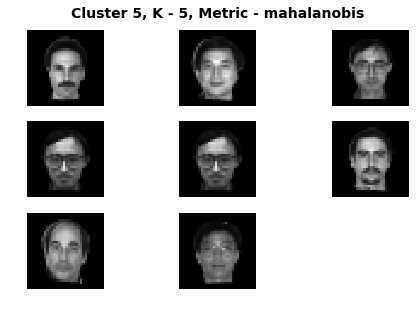

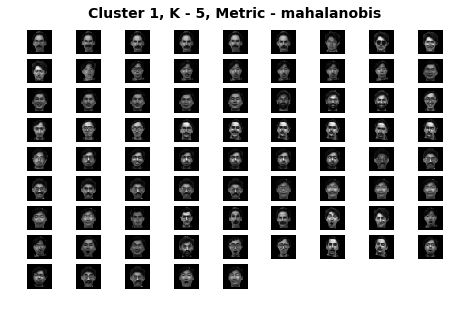

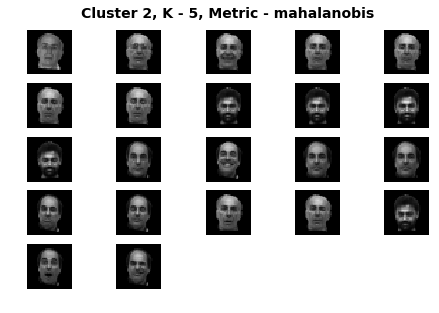

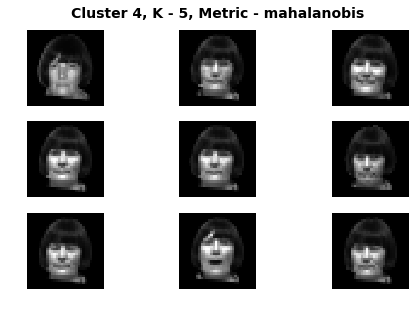

  4%|▍         | 4/100 [00:00<00:02, 35.61it/s]

find_centers - elapsed time: 0.10242509841918945


100%|██████████| 100/100 [00:03<00:00, 31.23it/s]


clusterize - elapsed time: 3.2048580646514893


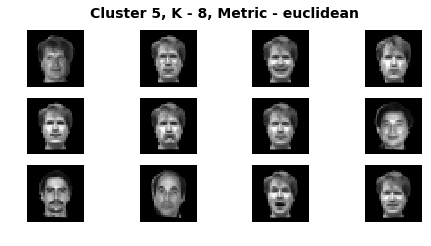

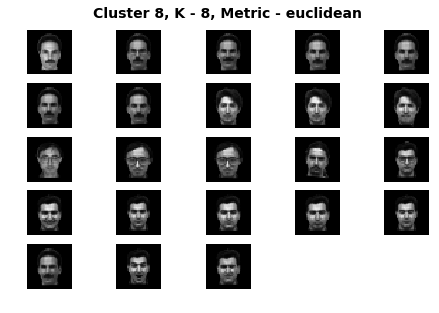

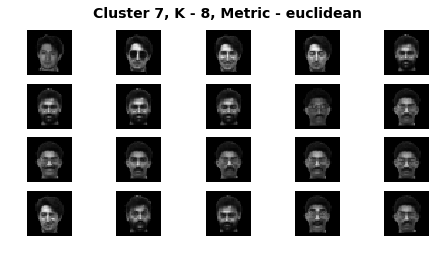

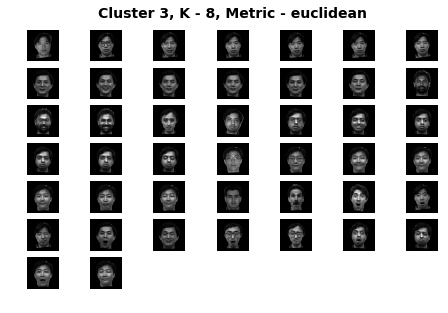

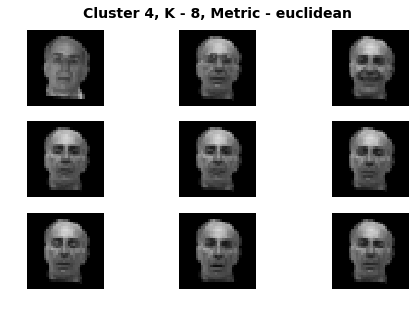

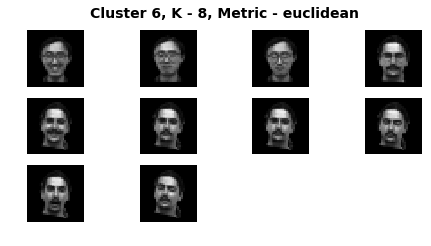

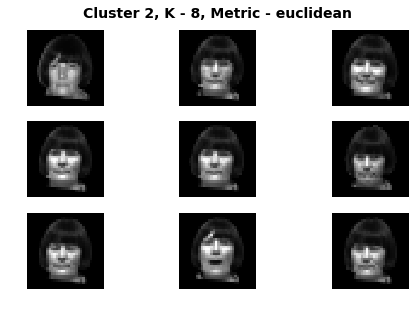

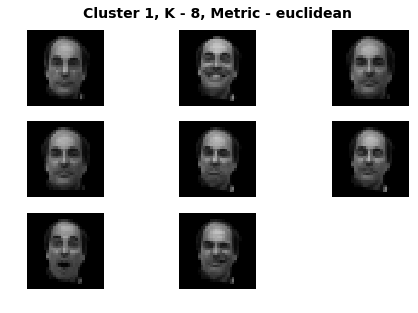

  6%|▌         | 6/100 [00:00<00:01, 53.48it/s]

find_centers - elapsed time: 0.06825017929077148


100%|██████████| 100/100 [00:01<00:00, 55.09it/s]


clusterize - elapsed time: 1.8184139728546143


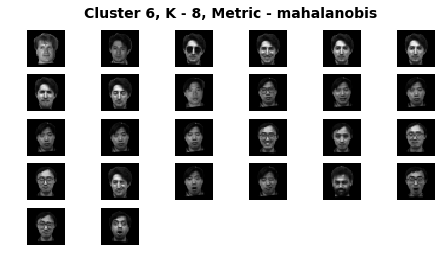

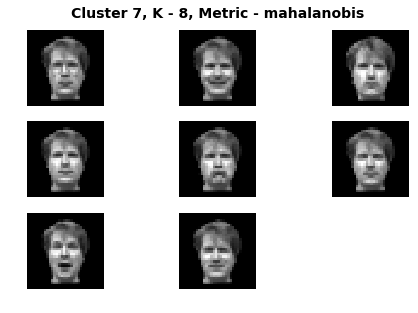

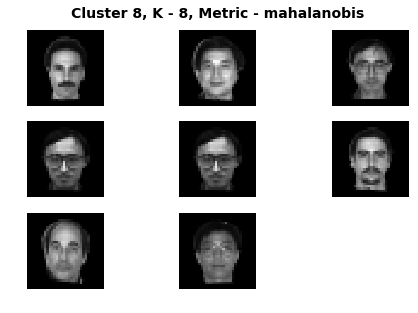

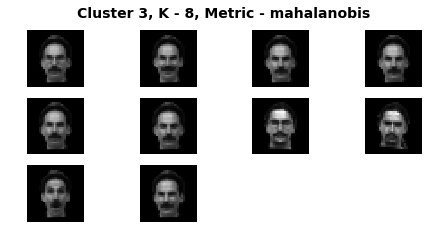

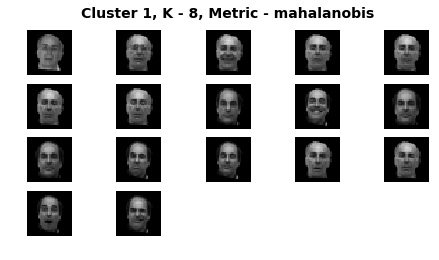

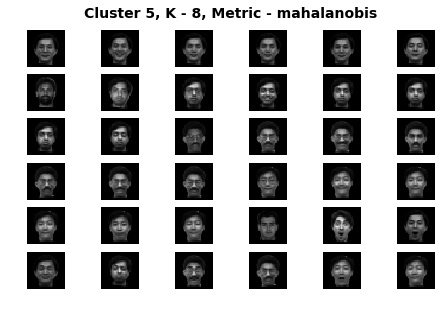

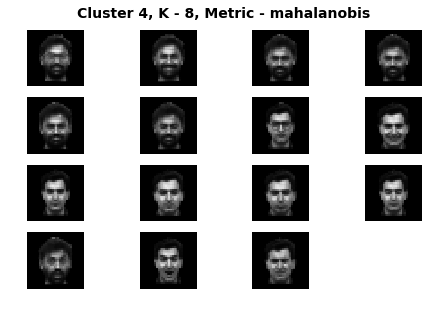

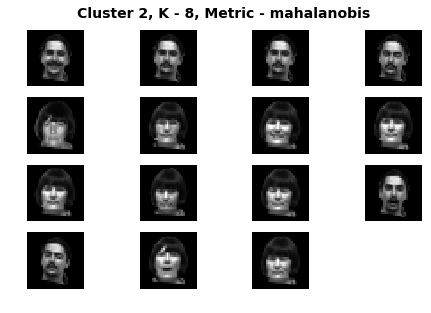

  3%|▎         | 3/100 [00:00<00:03, 29.26it/s]

find_centers - elapsed time: 0.1312577724456787


100%|██████████| 100/100 [00:03<00:00, 27.19it/s]


clusterize - elapsed time: 3.680903911590576


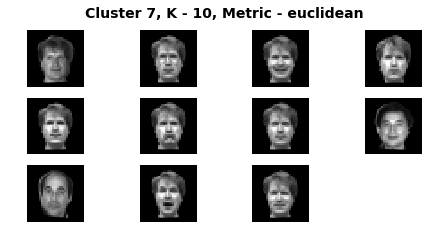

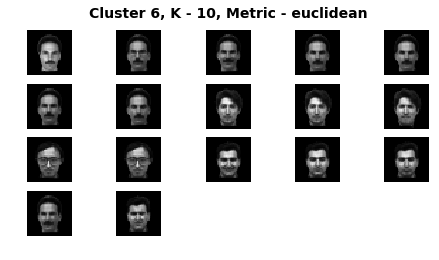

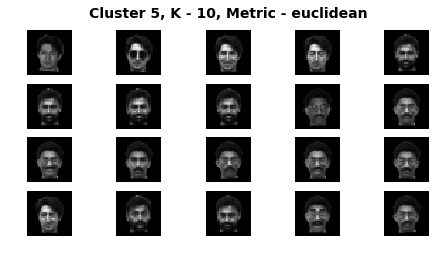

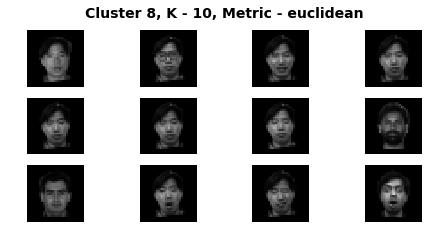

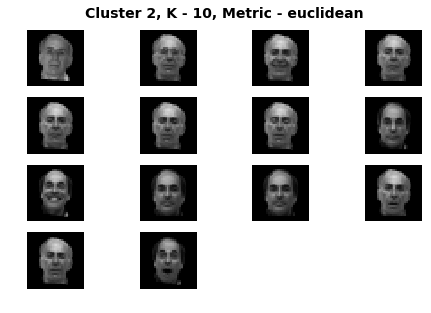

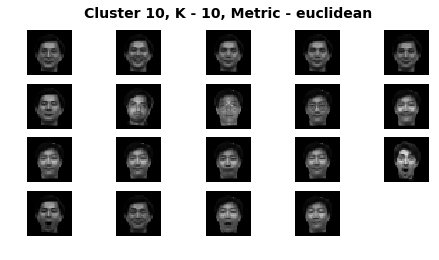

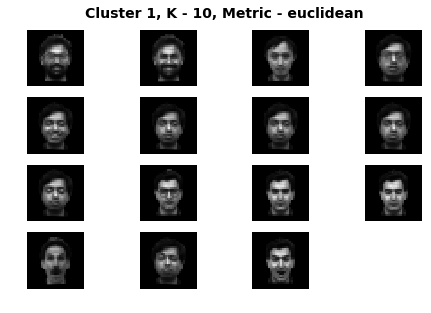

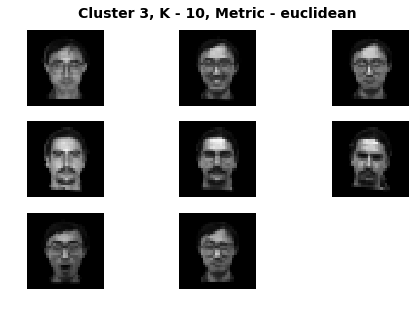

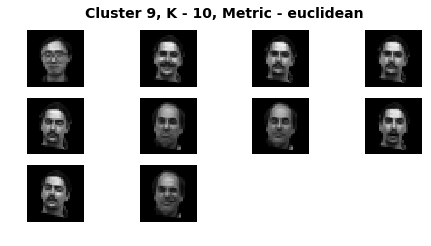

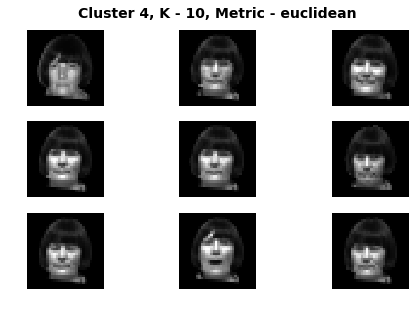

  4%|▍         | 4/100 [00:00<00:02, 37.11it/s]

find_centers - elapsed time: 0.12270092964172363


100%|██████████| 100/100 [00:02<00:00, 46.69it/s]


clusterize - elapsed time: 2.1455018520355225


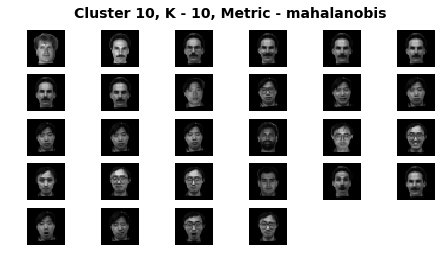

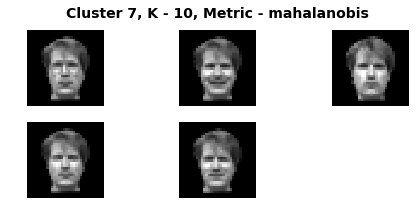

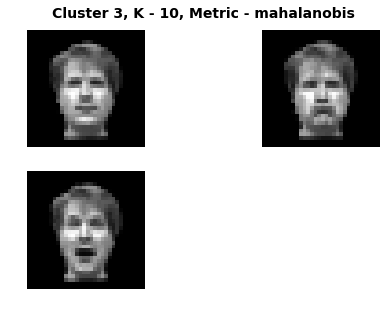

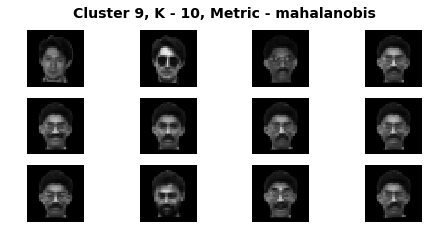

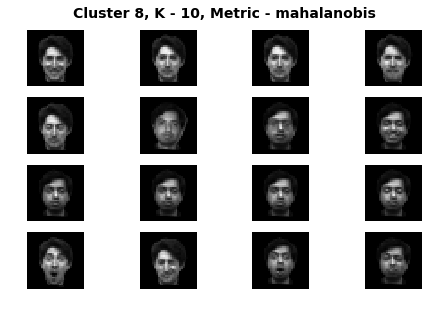

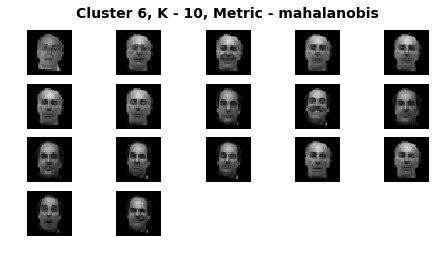

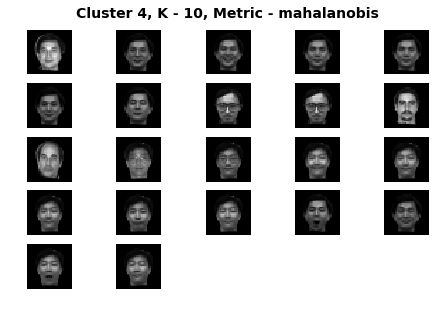

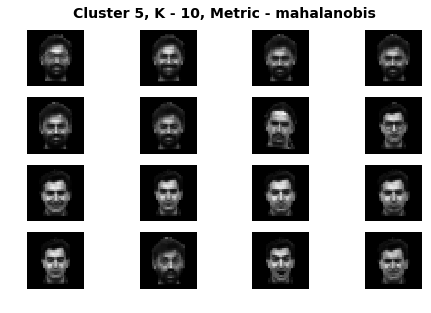

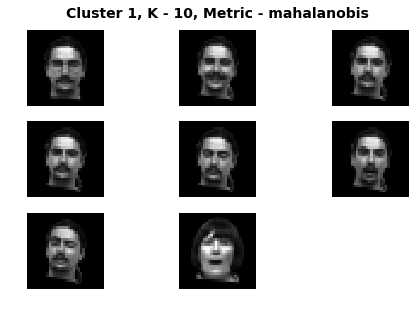

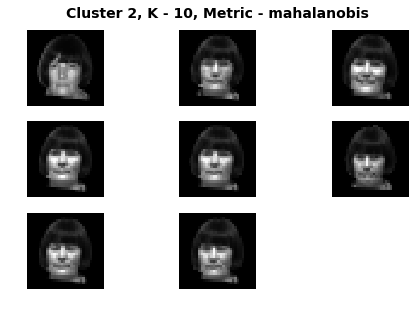

In [2]:
import kmeans
kmeans.mahalanobis_experiment()

Z wyników powyższego ekseprymentu można wywnioskować, że metryka mahalanobisa już dla K=2 daję nam akceptowalny wynik. Czego nie możemy powiedzieć o wariancie z metryką euklidesową.
Warto zauważyć, że dla K = 8 klastry mają najlepszą jakość.

## Klasteryzacja hierarchiczna
Dla 3 zadanych grafów wykonałem klasteryzację hierarchiczną. Parametrami są tutaj metoda (single-link, complete-link, average-link) klasteryzacji oraz metryka (euclidean,correlation,shortest path). Wyniki przedstawiam poniżej:

/Users/patryksladek/PycharmProjects/mro_lab2/hierarchical_clustering.py:60: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(a, method=method, metric=metric)
/Users/patryksladek/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/patryksladek/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/patryksladek/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.ho

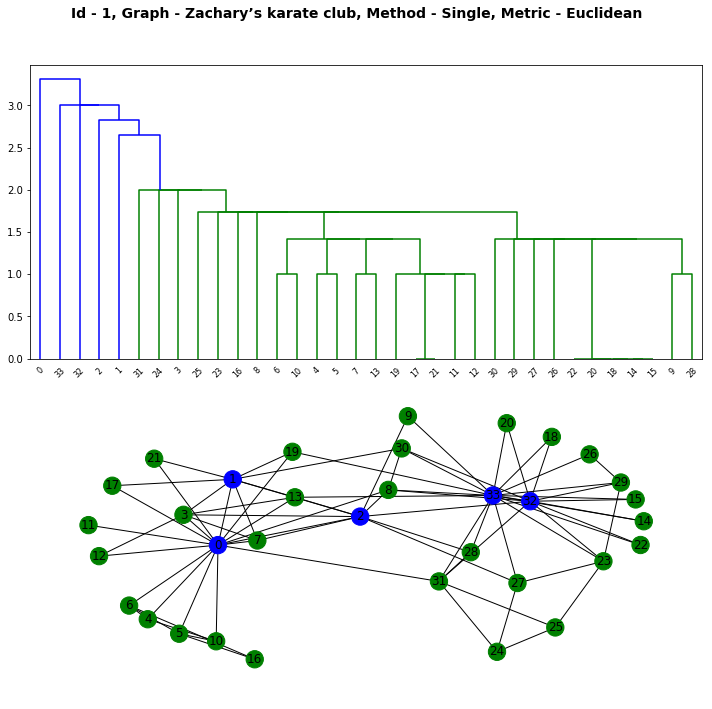

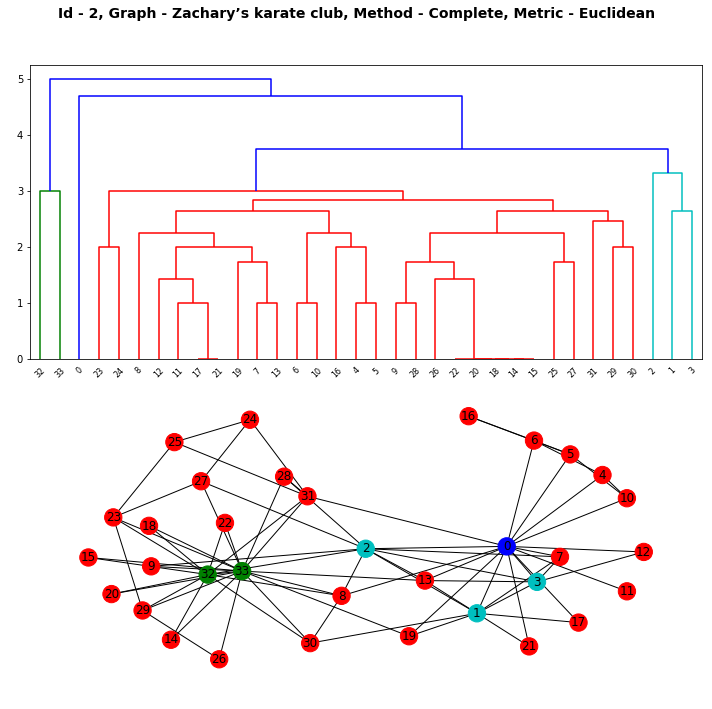

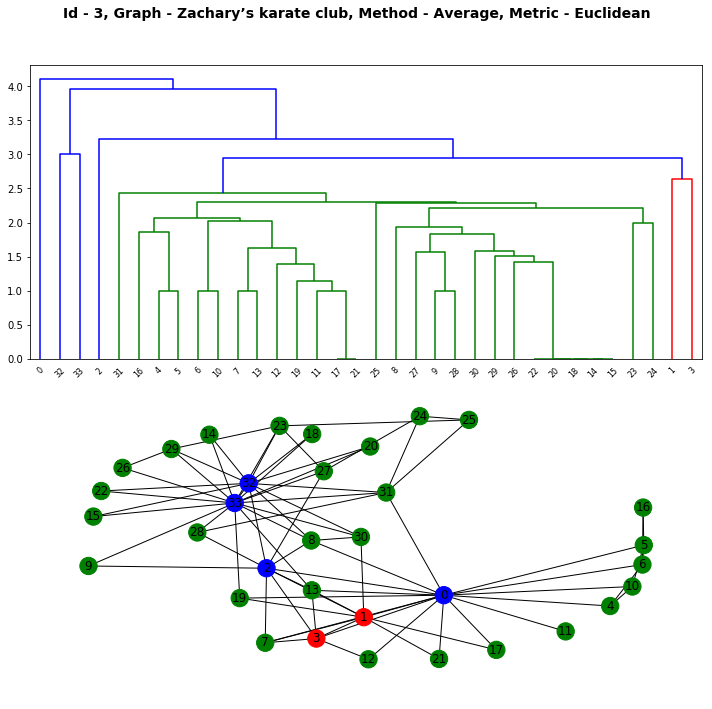

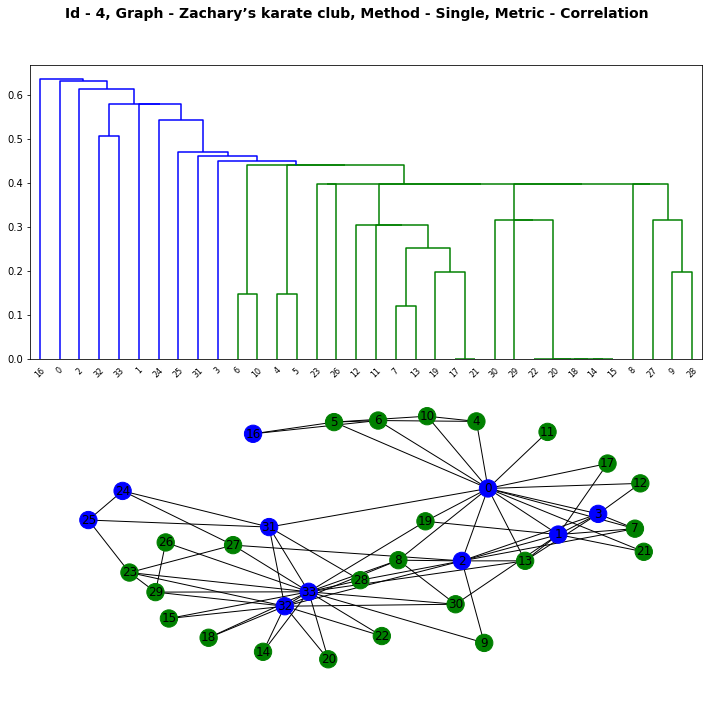

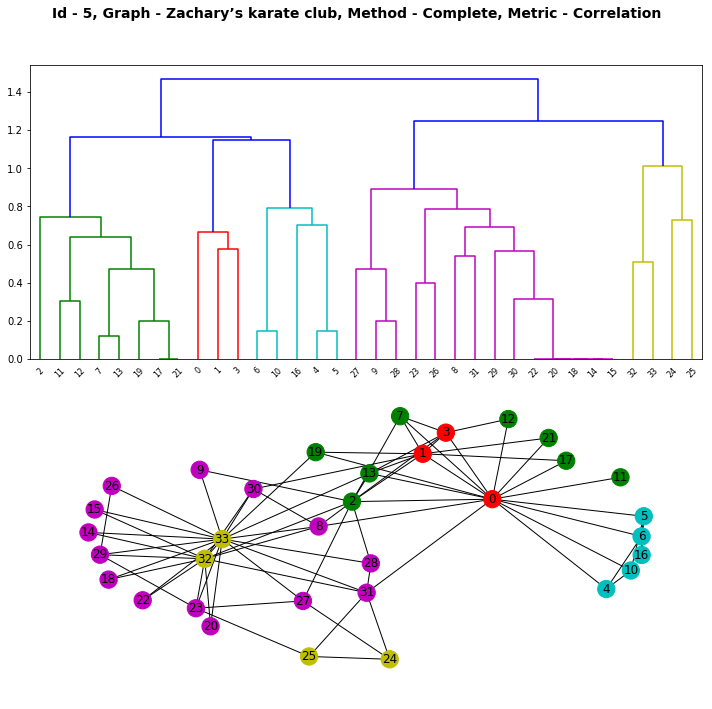

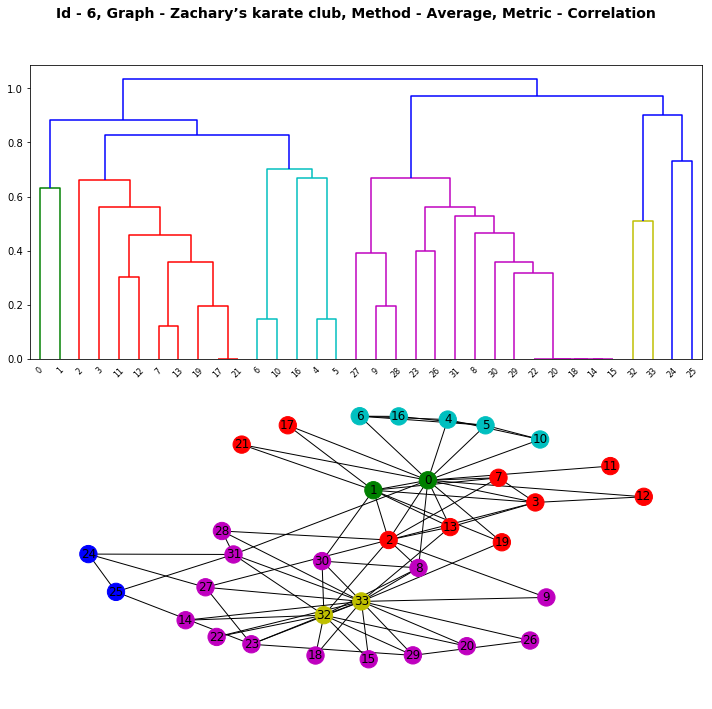

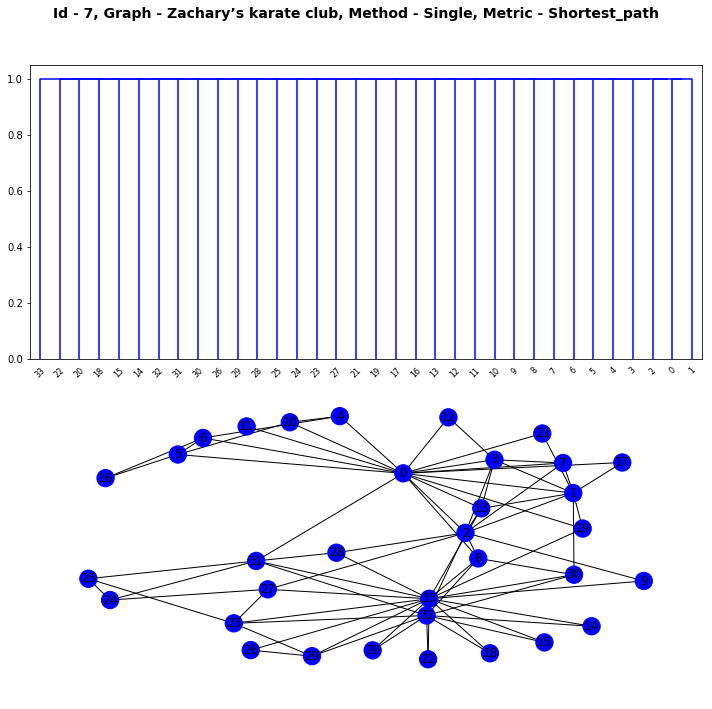

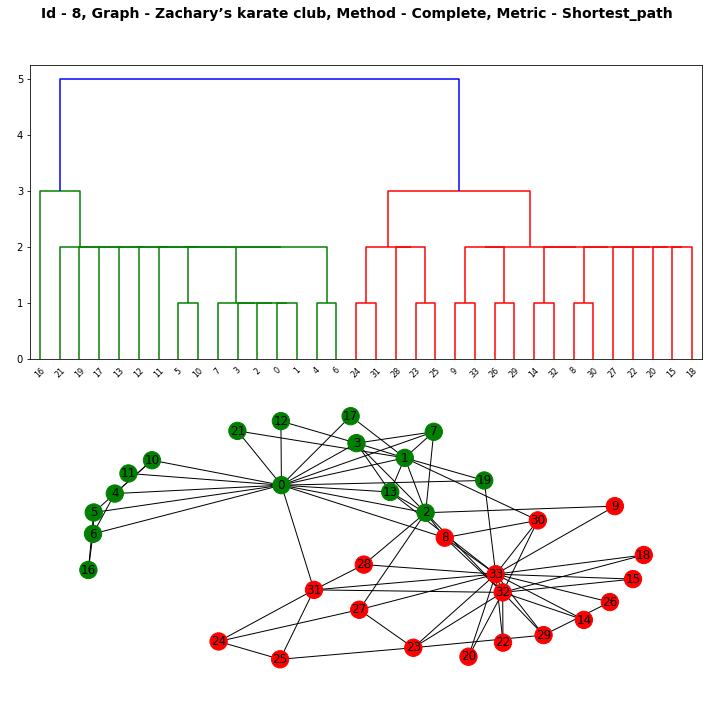

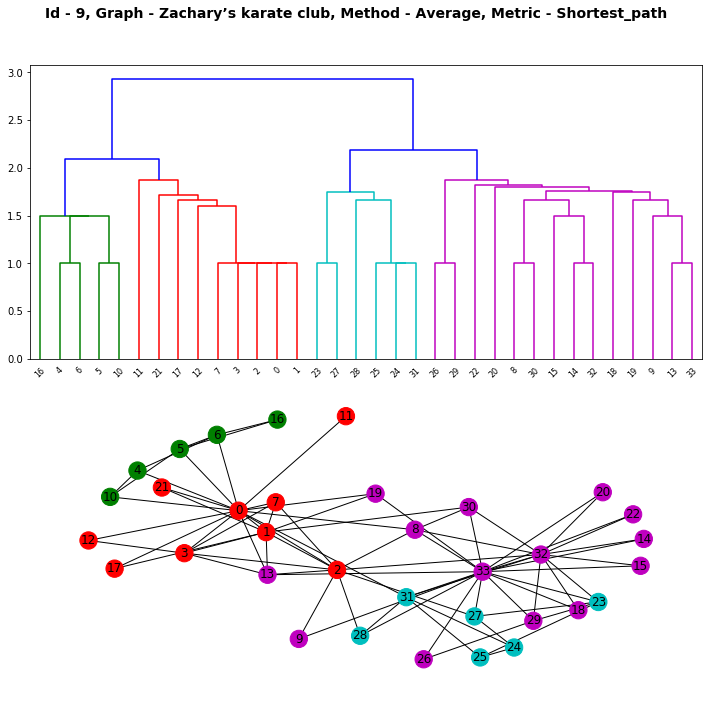

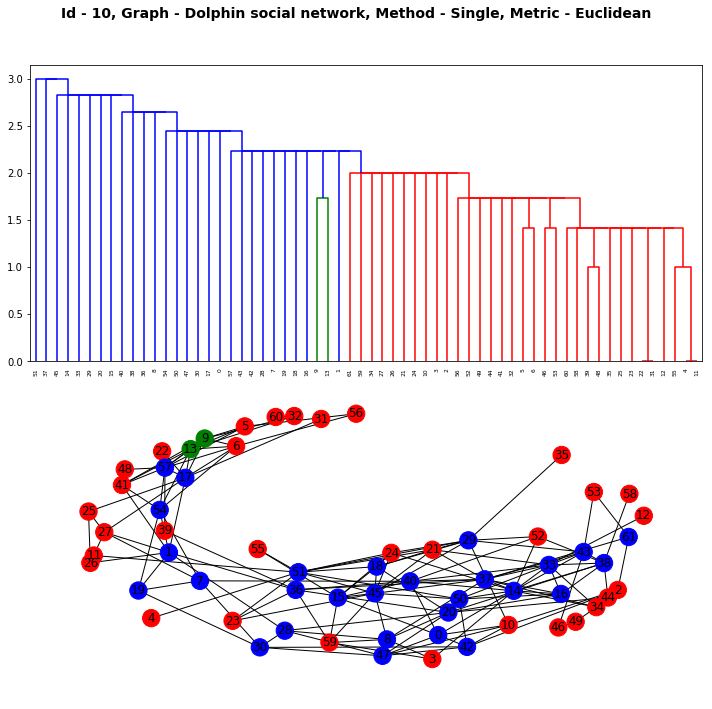

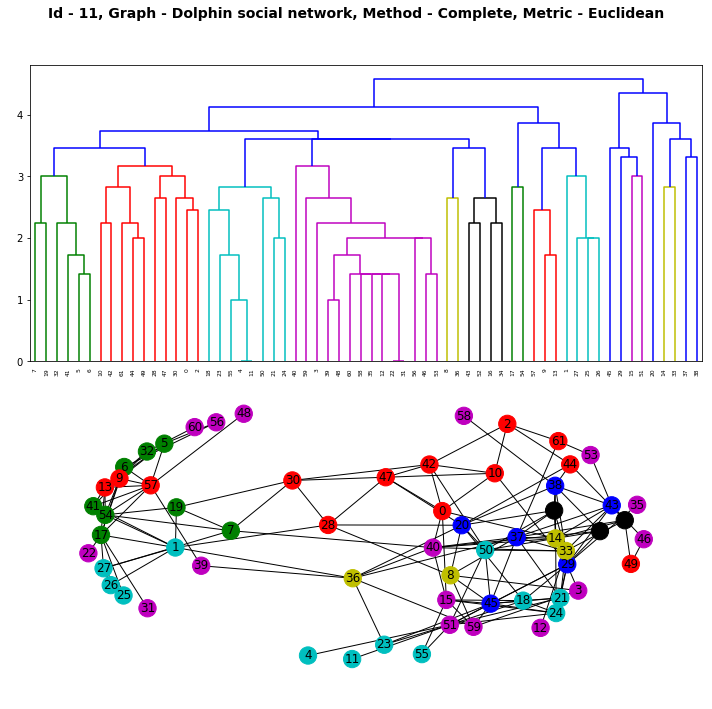

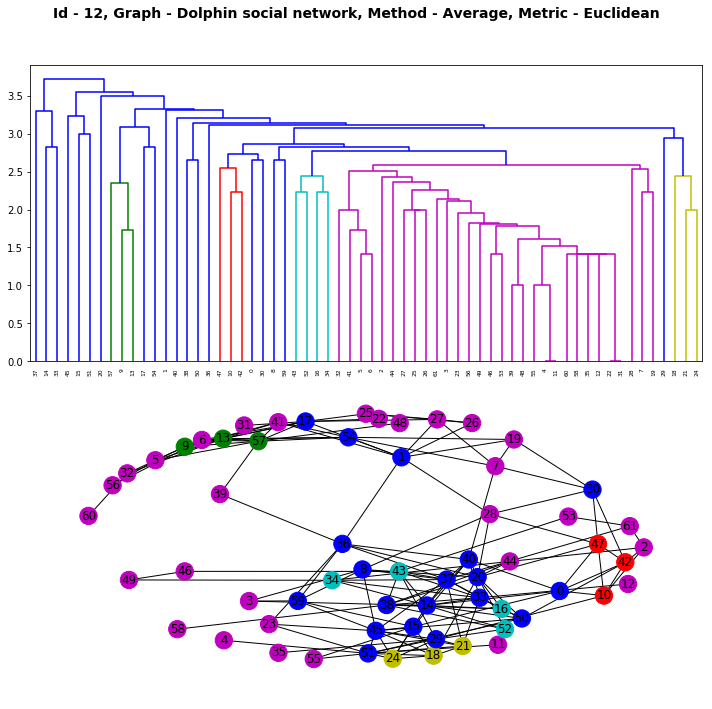

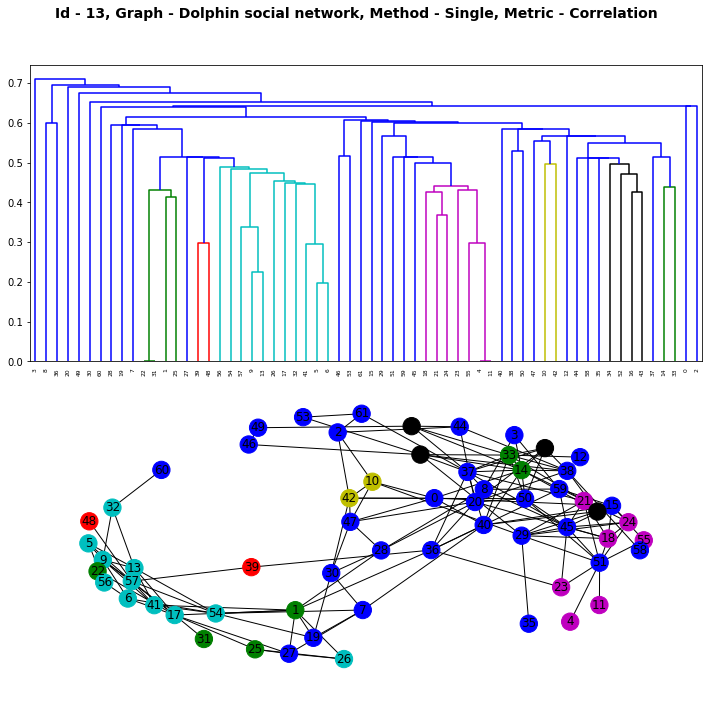

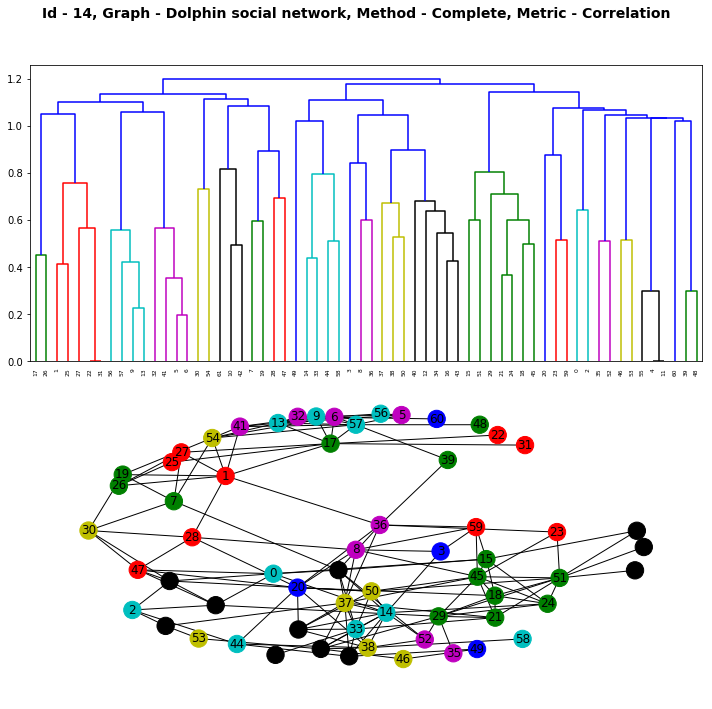

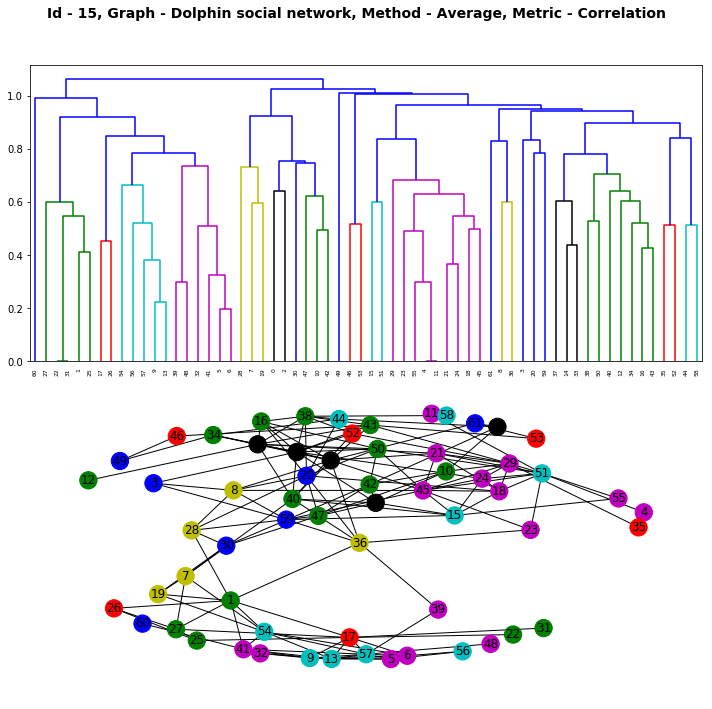

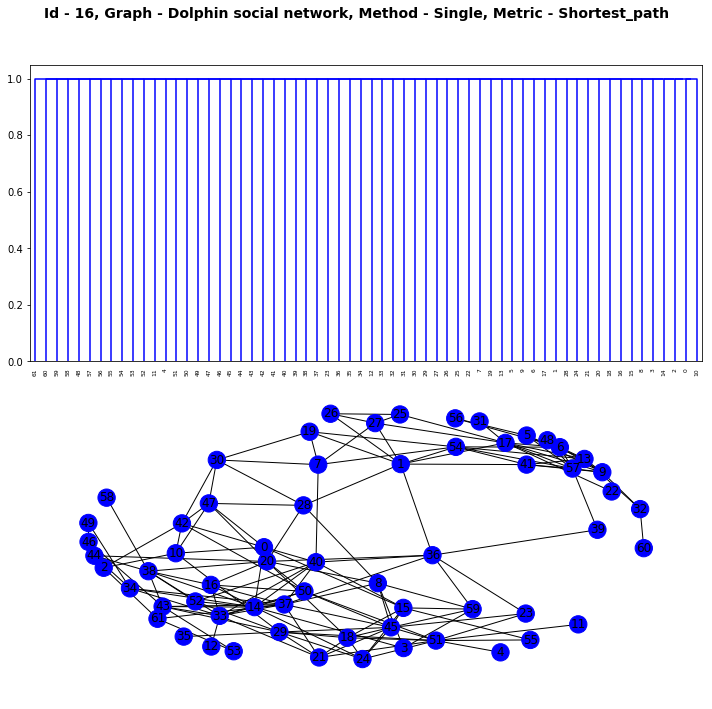

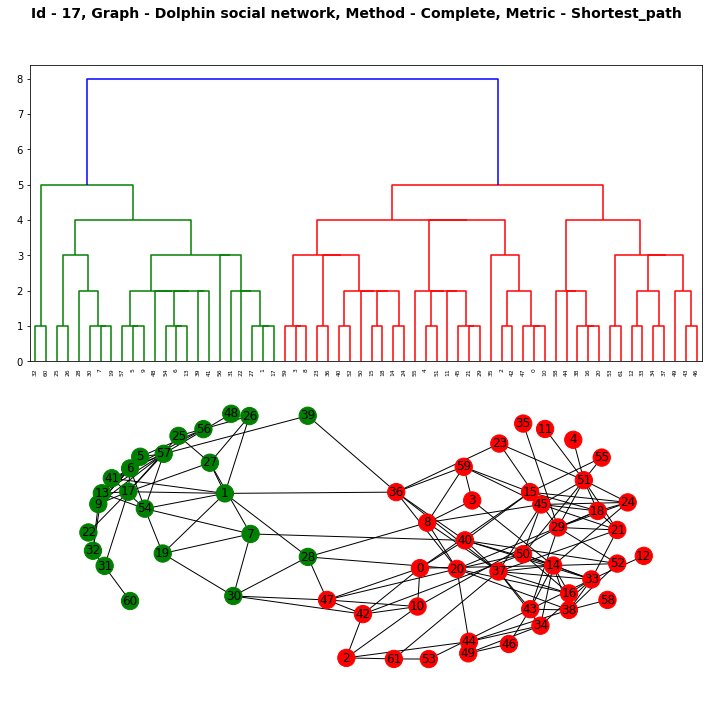

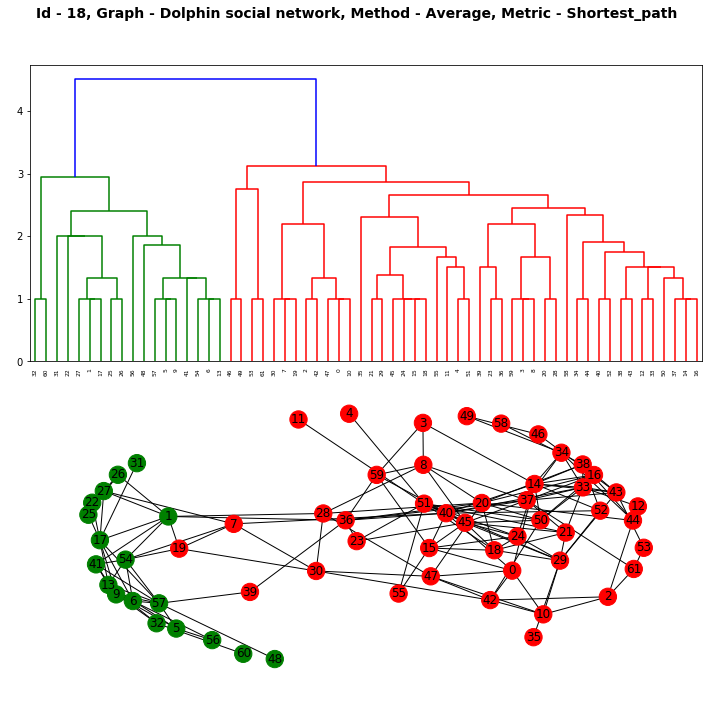

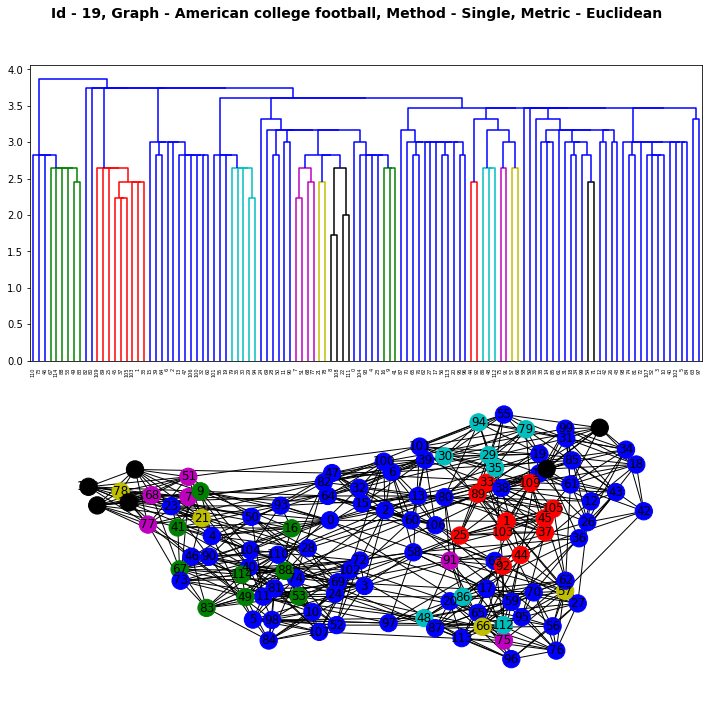

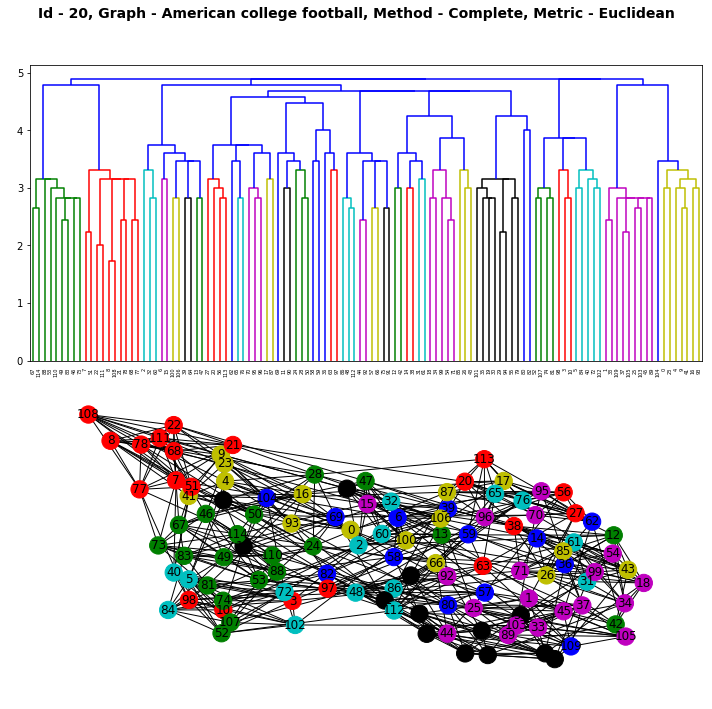

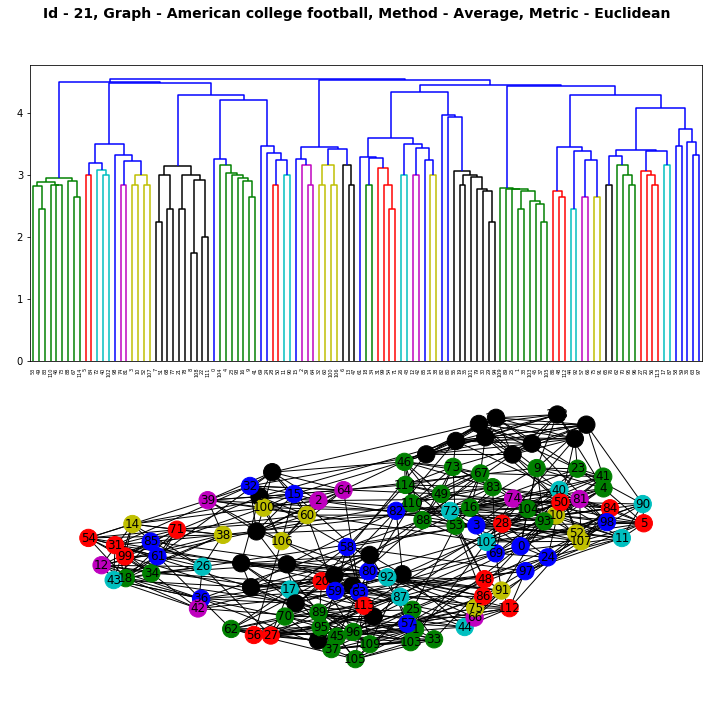

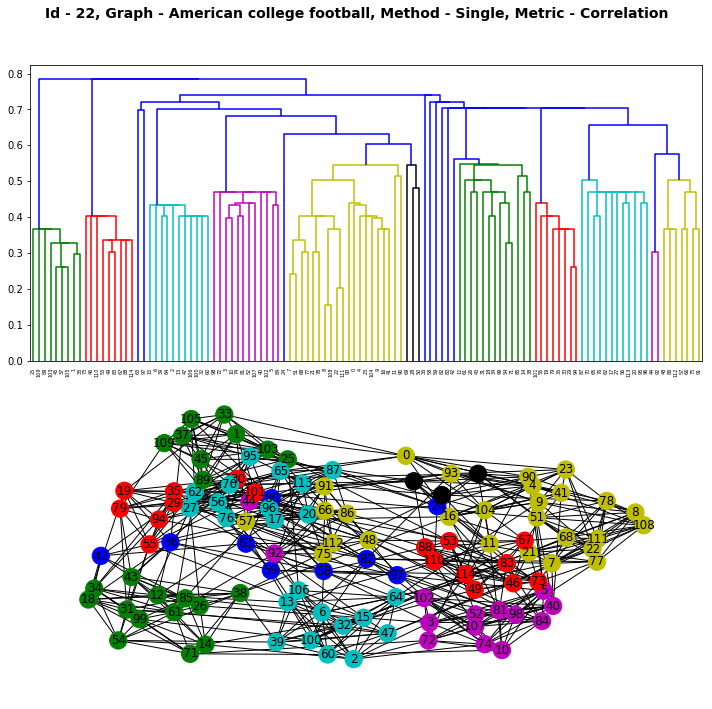

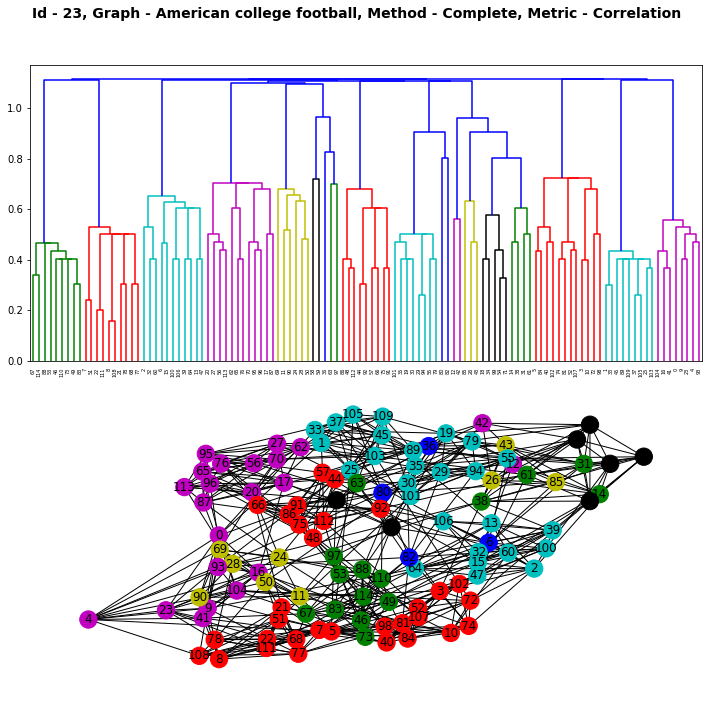

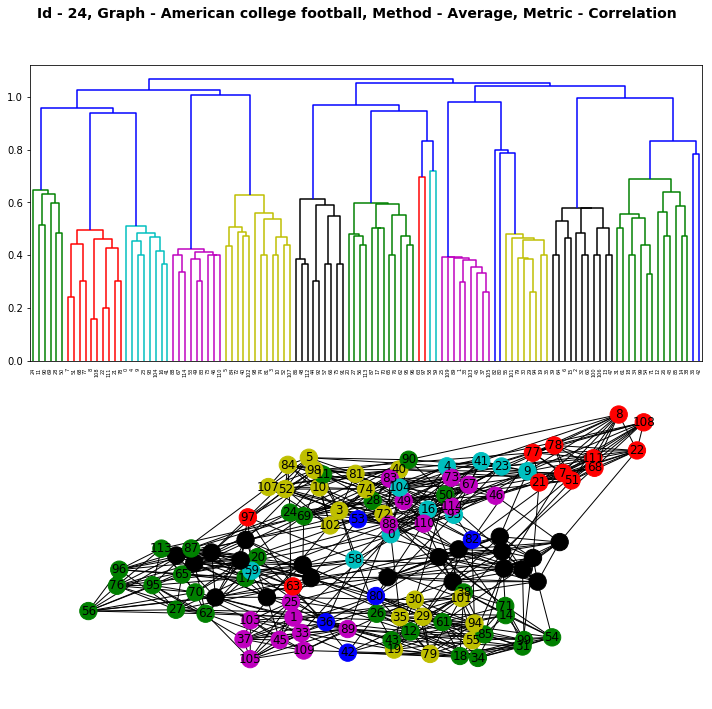

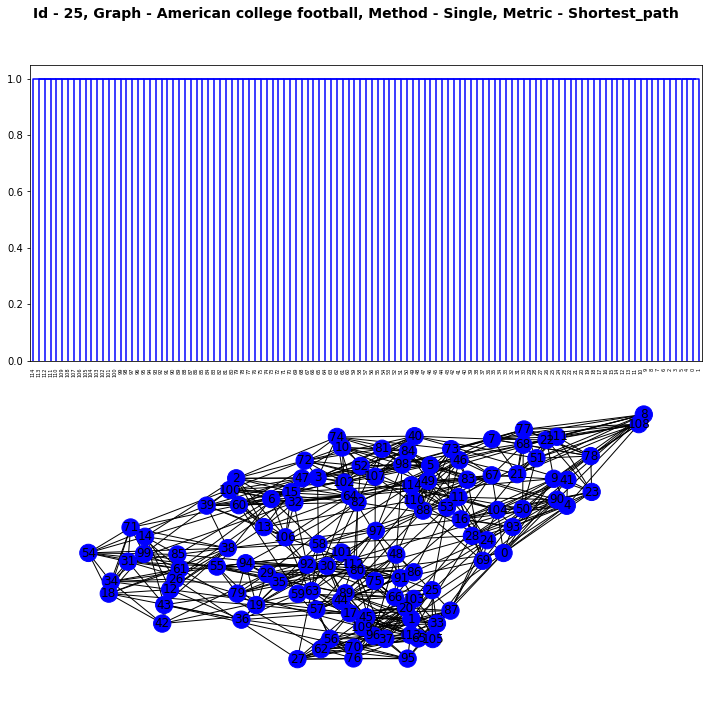

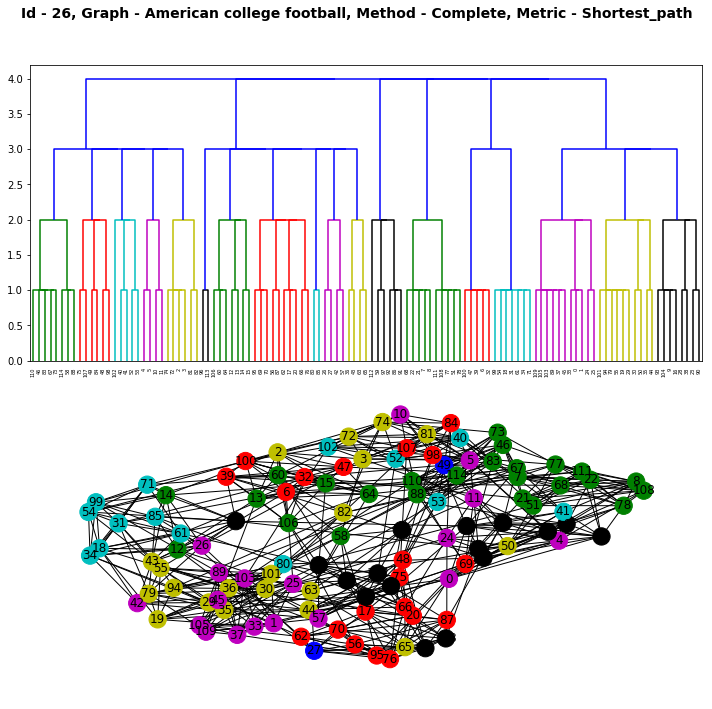

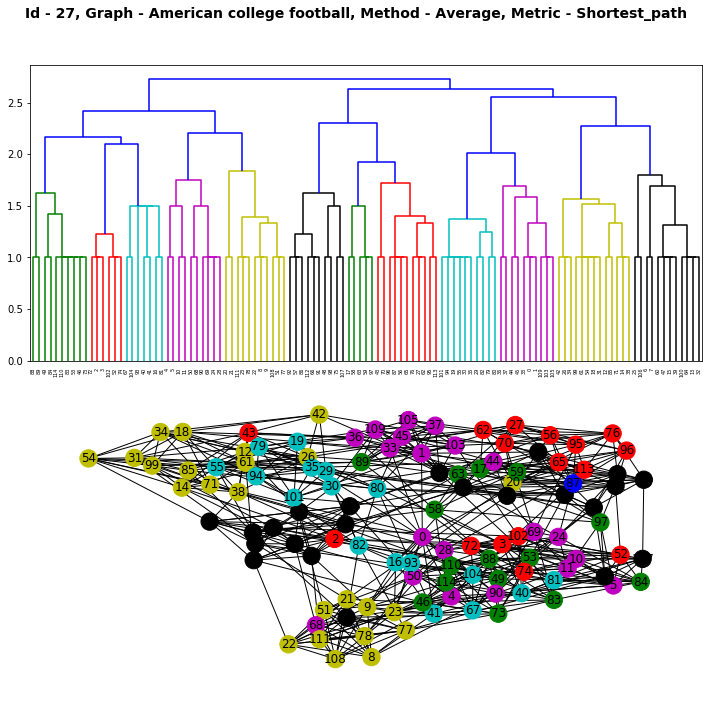

In [1]:
from hierarchical_clustering import main
main()

Dla metryki euklidesowej oraz metody single-link możemy bardzo ładnie zobaczyć, w jaki sposób grupowane wierzchołki.
Dla grafu nr 1 widać, że na początku złączone zostały wierzchołki 17 i 21 oraz 22,20,18,14,15.
Klastry te charakteryzuje jak najmniejsza liczba zgodnych sąsiadów, czyli jest to zgodne z założeniami algorytmu(dla single-link wybieramy minimum z odległości).
Graf nr 2 wykorzystuje metode complete-link clustering. Tutaj bierzemy najwiekszą odległość pomiędzy elementami dwóch klastrów i na końcu wybieramy taką parę klastrów, dla których ta wartość jest najmniejsza.
Porównując wykresy 1 i 2 widać, że na grafie nr 1 mamy sporo klastrów z tą samą odległością. Na wykresie nr 2 mamy większe zróżnicowanie jeśli chodzi o klastry na danych odległościach.
Dla complete-link widać to charakterystyczne zbyt duże przywiązywanie uwagi do "outlierów".
Dla average-link, czyli grafu nr 3, mamy zredukowanie tego efektu przywiązania do "outlierów".

Dla metryki shortest-path single-link daje nie statysfakcjonujący wyniki dla wszystkich 3 grafów.
Dla complete-link bardzo dobrze widać zmaksymalizowane grupy wierzchołków, które są oddalone od siebie o konkretną odległość. Za przykład można podać klikę z wykresu nr 8 [7,3,2,0,1]
Pozostałe grafy pokazują jedynie inne podziały na klastry. Wnioski są jednakowe.